<a href="https://colab.research.google.com/github/tdejaeger/Epita_lectures/blob/main/Session2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Session 2: Filtering, Edge Detection & Shape Detection**

In [2]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

In [3]:
from google.colab import files
img1=files.upload()


Saving Lena.png to Lena.png


## **How filtering works?**


Averaging Filter: each output pixel becomes the average of its 8 neighbors and itself.


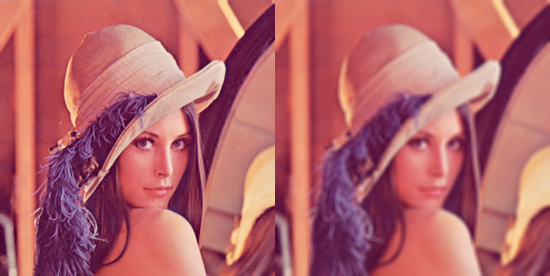

In [6]:
img = cv2.imread('Lena.png')
img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)  # Scale to 50% to have smaller image
blurred = cv2.blur(img, (5, 5))
# Concatenate images horizontally
combined = np.hstack((img, blurred))
cv2_imshow(combined)

## **Try different kernel size**

Larger size -> less details

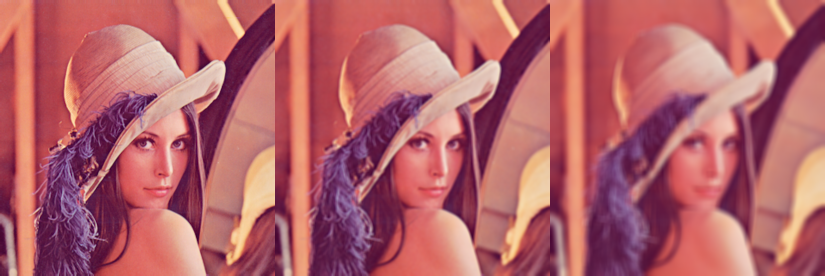

In [7]:
# Difference between different kernel size
img = cv2.imread('Lena.png')
img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)  # Scale to 50% to have smaller image
blurred = cv2.blur(img, (3, 3))
blurred2 = cv2.blur(img, (7, 7))
# Concatenate images horizontally
combined = np.hstack((img, blurred, blurred2))
cv2_imshow(combined)

## **Try our own kernel**

You can apply the kernel you want

[[0.07371969 0.15354874 0.0815414 ]
 [0.12907436 0.02096924 0.22146454]
 [0.09600322 0.09626468 0.12741414]]


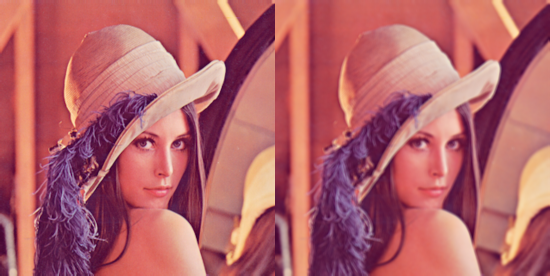

In [37]:
# Difference between different kernel size
img = cv2.imread('Lena.png')
img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)  # Scale to 50% to have smaller image

# Average
kernel = np.ones((3,3), np.float32)/9
#Random
kernel=np.random.random((3, 3))
kernel = kernel / kernel.sum()  # Normalize so sum = 1

print(kernel)
filtered = cv2.filter2D(img, -1, kernel) # -1 automatically use the same bit depth as the source image.
combined = np.hstack((img, filtered))
cv2_imshow(combined)

## **Box Blur filter**

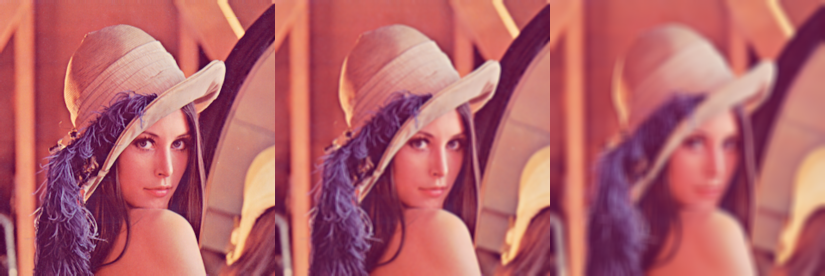

(276, 275, 3)

In [45]:
# Difference between different kernel size
img = cv2.imread('Lena.png')
img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)  # Scale to 50% to have smaller image
blurred = cv2.blur(img, (3, 3))
blurred2 = cv2.blur(img, (9, 9))
# Concatenate images horizontally
combined = np.hstack((img, blurred, blurred2))
cv2_imshow(combined)


## **Gaussian Blur filter**

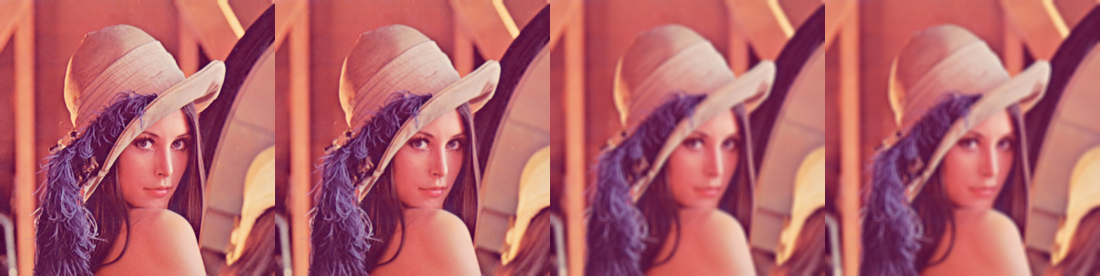

In [51]:
# Difference between different kernel size
img = cv2.imread('Lena.png')
img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)  # Scale to 50% to have smaller image
blurred = cv2.GaussianBlur(img, (5, 5), sigmaX=0.5)
blurred2 = cv2.GaussianBlur(img, (5, 5), sigmaX=3.0)
blurred3 = cv2.GaussianBlur(img, (5, 5), sigmaX=40.0)
# Concatenate images horizontally
combined = np.hstack((img, blurred, blurred2,blurred3))
cv2_imshow(combined)


## **Median Blur filter**

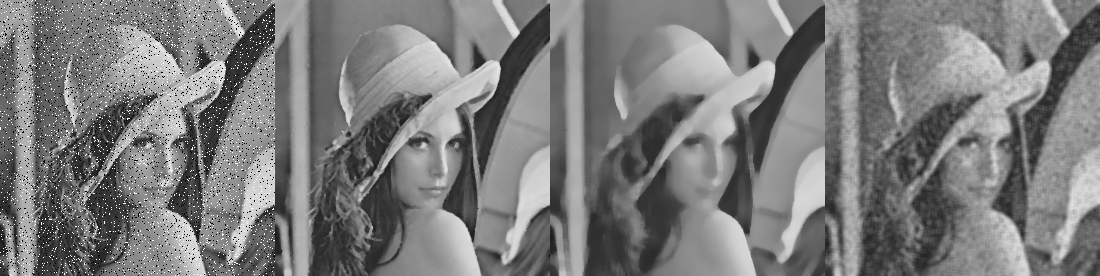

In [83]:
img = cv2.imread('Lena.png')
img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)  # Scale to 50% to have smaller image

#Add noise
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

noise_mask =  np.random.randint(0, 21, size = (img_gray.shape[0], img_gray.shape[1]), dtype=int)
zeros_pixel = np.where(noise_mask == 0)
one_pixel = np.where(noise_mask == 20)

img_gray[zeros_pixel] = 0
img_gray[one_pixel] = 255


blurred = cv2.medianBlur(img_gray, 3)
blurred2 = cv2.medianBlur(img_gray, 9)
blurred3 = cv2.GaussianBlur(img_gray, (5, 5), sigmaX=3)

# Concatenate images horizontally
combined = np.hstack((img_gray, blurred, blurred2, blurred3))
cv2_imshow(combined)



## **Bilateral Blur filter**

In [20]:
img1=files.upload()


Saving taj_noise.jpg to taj_noise.jpg


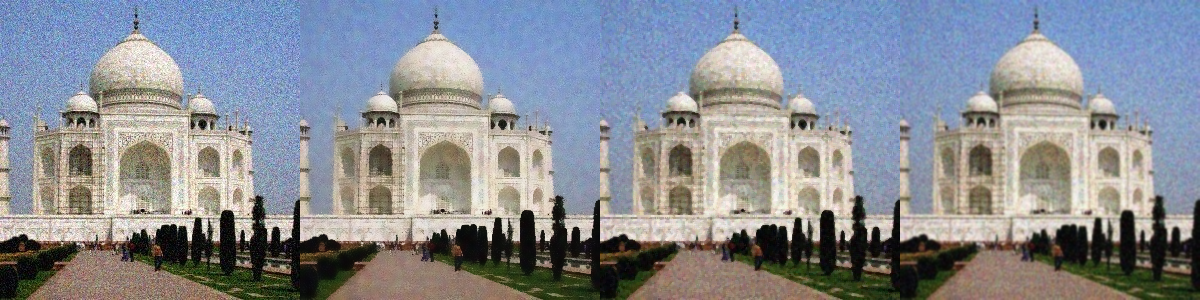

In [91]:
img = cv2.imread('taj_noise.jpg')

blurred =cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)
blurred2 = cv2.medianBlur(img, 3)
blurred3 = cv2.GaussianBlur(img, (5, 5), sigmaX=1)

# Concatenate images horizontally
combined = np.hstack((img, blurred, blurred2, blurred3))
cv2_imshow(combined)



## **Shapening filter**

[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


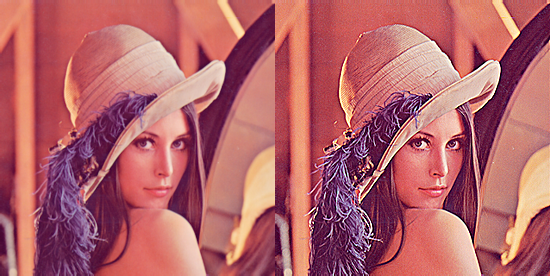

In [4]:
img = cv2.imread('Lena.png')
img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)  # Scale to 50% to have smaller image

# Average
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

filtered = cv2.filter2D(img, -1, kernel) # -1 automatically use the same bit depth as the source image.
combined = np.hstack((img, filtered))
cv2_imshow(combined)

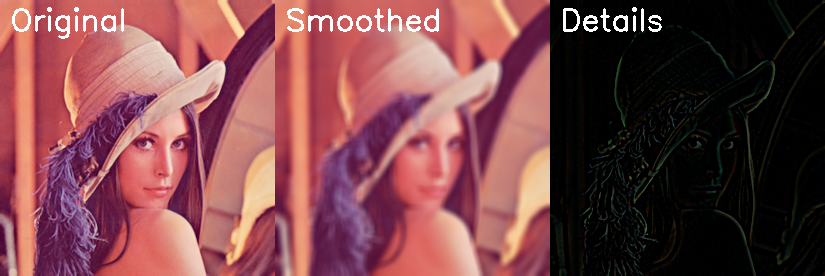

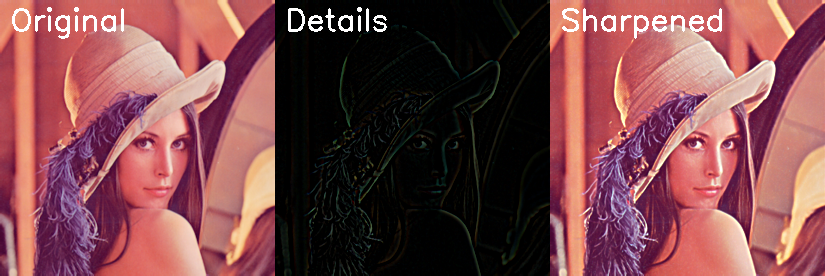

In [17]:
img = cv2.imread('Lena.png')
img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)  # Scale to 50% to have smaller image
font = cv2.FONT_HERSHEY_SIMPLEX
img2=img.copy()

cv2.putText(img, 'Original', (10, 30), font, 1, (255, 255, 255), 2)
smooth = cv2.blur(img2, (7, 7))
cv2.putText(smooth, 'Smoothed', (10, 30), font, 1, (255, 255, 255), 2)
subtracted = cv2.subtract(img2, smooth)
sub=subtracted.copy()
cv2.putText(subtracted, 'Details', (10, 30), font, 1, (255, 255, 255), 2)

combined = np.hstack((img, smooth,subtracted))
cv2_imshow(combined)
added=cv2.add(img2,sub)
cv2.putText(added, 'Sharpened', (10, 30), font, 1, (255, 255, 255), 2)

combined = np.hstack((img,subtracted,added))
cv2_imshow(combined)

## **Fast denoise**

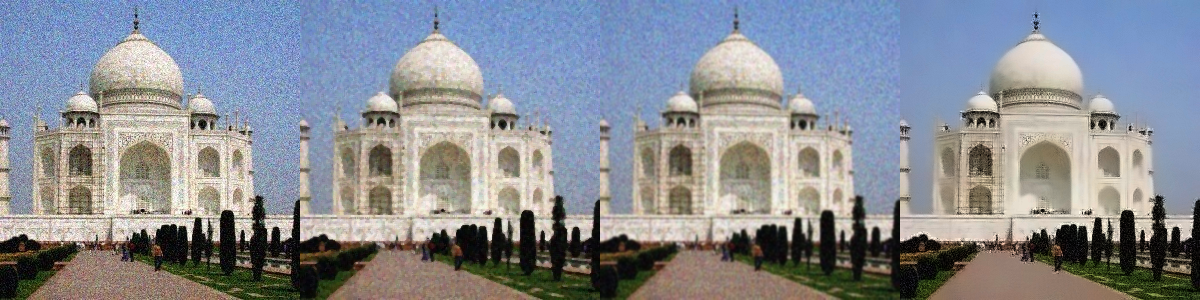

In [25]:
img = cv2.imread('taj_noise.jpg')

blurred = cv2.medianBlur(img, 3)
blurred2 = cv2.GaussianBlur(img, (5, 5), sigmaX=1)

dst = cv2.fastNlMeansDenoisingColored(img, None, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21)
# Concatenate images horizontally
combined = np.hstack((img, blurred, blurred2,dst))
cv2_imshow(combined)

## **Sobel filter**

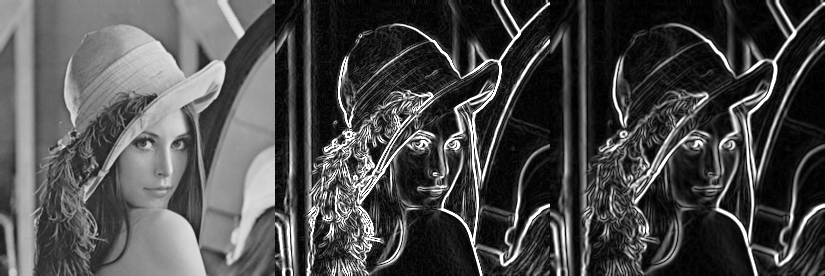

In [22]:
img = cv2.imread('Lena.png')
img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)  # Scale to 50% to have smaller image


#gray
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_blur=cv2.GaussianBlur(img_gray.copy(), (5, 5), sigmaX=1.0)


gx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
gy = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
magnitude = cv2.magnitude(gx, gy)
magnitude = cv2.convertScaleAbs(magnitude)


gx_blur = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
gy_blur = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)
magnitude_blur = cv2.magnitude(gx_blur, gy_blur)

magnitude_blur = cv2.convertScaleAbs(magnitude_blur)


combined = np.hstack((img_gray, magnitude, magnitude_blur))
cv2_imshow(combined)

## **Laplacian edge detector**

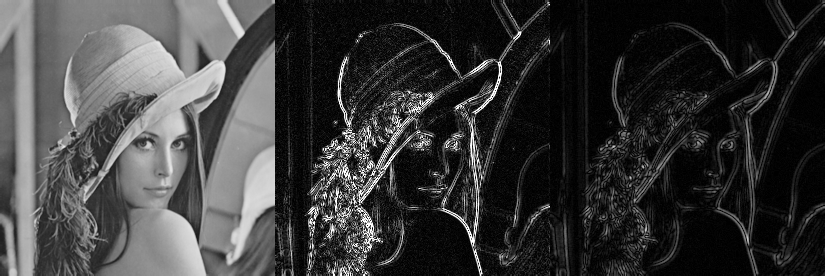

In [26]:
img = cv2.imread('Lena.png')
img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)  # Scale to 50% to have smaller image


#gray
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_blur=cv2.GaussianBlur(img_gray.copy(), (5, 5), sigmaX=1.0)

lap = cv2.Laplacian(img_gray, cv2.CV_64F, ksize=3)
lap_abs = cv2.convertScaleAbs(lap) #converting float to 8-bit

lap_blur = cv2.Laplacian(img_blur, cv2.CV_64F, ksize=3)
lap_abs_blur = cv2.convertScaleAbs(lap_blur) #converting float to 8-bit

combined = np.hstack((img_gray, lap_abs, lap_abs_blur))
cv2_imshow(combined)

## **Canny edge**

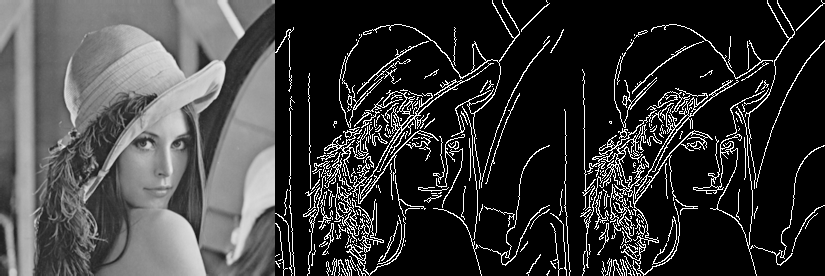

In [15]:
img = cv2.imread('Lena.png')
img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)  # Scale to 50% to have smaller image


#gray
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_blur=cv2.GaussianBlur(img_gray.copy(), (5, 5), sigmaX=1.0)

canny = cv2.Canny(img, 70, 200)
canny_blur = cv2.Canny(img_gray, 70, 200)
combined = np.hstack((img_gray, canny, canny_blur))
cv2_imshow(combined)

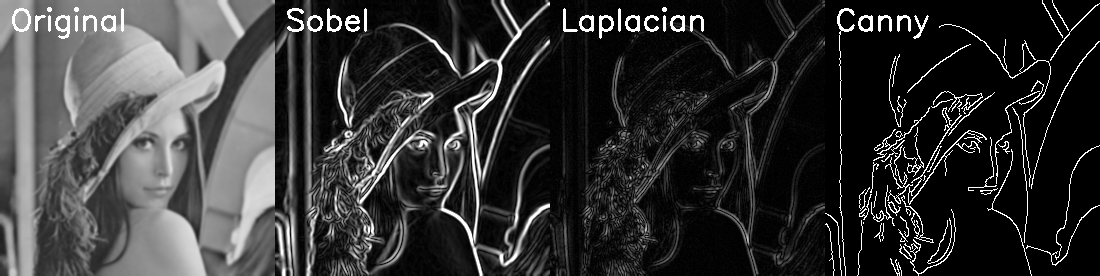

In [31]:
img = cv2.imread('Lena.png')
img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)  # Scale to 50% to have smaller image
font = cv2.FONT_HERSHEY_SIMPLEX

#gray
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#smooth gaussian
img_blur=cv2.GaussianBlur(img_gray.copy(), (5, 5), sigmaX=1.0)
img2=img_blur.copy()
cv2.putText(img_blur, 'Original', (10, 30), font, 1, (255, 255, 255), 2)
#Sobel
gx = cv2.Sobel(img2.copy(), cv2.CV_64F, 1, 0, ksize=3)
gy = cv2.Sobel(img2.copy(), cv2.CV_64F, 0, 1, ksize=3)
magnitude = cv2.magnitude(gx, gy)
sobel = cv2.convertScaleAbs(magnitude)
cv2.putText(sobel, 'Sobel', (10, 30), font, 1, (255, 255, 255), 2)

#Laplacian
lap = cv2.Laplacian(img2.copy(), cv2.CV_64F, ksize=3)
lap_abs = cv2.convertScaleAbs(lap) #converting float to 8-bi
cv2.putText(lap_abs, 'Laplacian', (10, 30), font, 1, (255, 255, 255), 2)

#Canny
canny= cv2.Canny(img2.copy(), 70, 200)
cv2.putText(canny, 'Canny', (10, 30), font, 1, (255, 255, 255), 2)




combined = np.hstack((img_blur,sobel,lap_abs,canny))
cv2_imshow(combined)

In [32]:
img3=files.upload()


Saving sudoku.jpg to sudoku.jpg


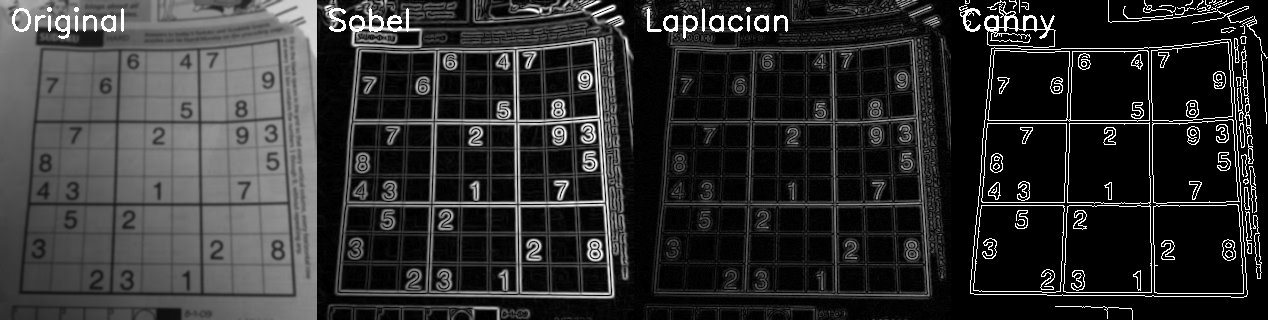

In [38]:
img = cv2.imread('sudoku.jpg')
font = cv2.FONT_HERSHEY_SIMPLEX

#gray
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#smooth gaussian
img_blur=cv2.GaussianBlur(img_gray.copy(), (5, 5), sigmaX=1.0)
img2=img_blur.copy()
cv2.putText(img_blur, 'Original', (10, 30), font, 1, (255, 255, 255), 2)
#Sobel
gx = cv2.Sobel(img2.copy(), cv2.CV_64F, 1, 0, ksize=3)
gy = cv2.Sobel(img2.copy(), cv2.CV_64F, 0, 1, ksize=3)
magnitude = cv2.magnitude(gx, gy)
sobel = cv2.convertScaleAbs(magnitude)
cv2.putText(sobel, 'Sobel', (10, 30), font, 1, (255, 255, 255), 2)

#Laplacian
lap = cv2.Laplacian(img2.copy(), cv2.CV_64F, ksize=3)
lap_abs = cv2.convertScaleAbs(lap) #converting float to 8-bi
cv2.putText(lap_abs, 'Laplacian', (10, 30), font, 1, (255, 255, 255), 2)

#Canny
canny= cv2.Canny(img2.copy(), 70, 150)
cv2.putText(canny, 'Canny', (10, 30), font, 1, (255, 255, 255), 2)




combined = np.hstack((img_blur,sobel,lap_abs,canny))
cv2_imshow(combined)

## **Contour detection**



In [39]:
img4=files.upload()


Saving shapes_donut.png to shapes_donut.png


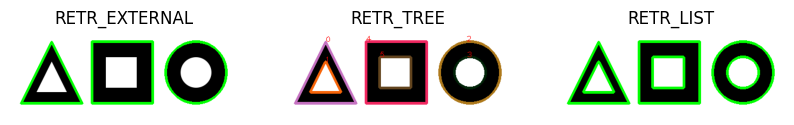

In [57]:
img = cv2.imread('shapes_donut.png')
img2 = img.copy()
img3 = img.copy()

imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
'''
If pixel value > 127 → set it to 0 (black)

If pixel value ≤ 127 → set it to 255 (white)

because we invert
'''
ret, imthres = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)

contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contour2, hierarchy = cv2.findContours(imthres, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contour3, hierarchy = cv2.findContours(imthres, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)


cv2.drawContours(img, contour, -1, (0,255,0), 3) # draw the outest contour line
cv2.drawContours(img3, contour3, -1, (0,255,0), 3)

for idx, cont in enumerate(contour2): # draw tall contour lines
    color = [int(i) for i in np.random.randint(0,255, 3)]
    cv2.drawContours(img2, contour2, idx, color, 3)
    cv2.putText(img2, str(idx), tuple(cont[0][0]), cv2.FONT_HERSHEY_PLAIN, 1, (0,0,255)) # show indx no


fig, axs = plt.subplots(1,3,figsize=(10,10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('RETR_EXTERNAL')
axs[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('RETR_TREE')
axs[2].imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)), axs[2].axis('off'), axs[2].set_title('RETR_LIST')

plt.show()

## **Shape matching**



In [90]:
img=files.upload()


Saving girafe_shadow.jpeg to girafe_shadow.jpeg


In [59]:
img=files.upload()


Saving animals.jpeg to animals.jpeg


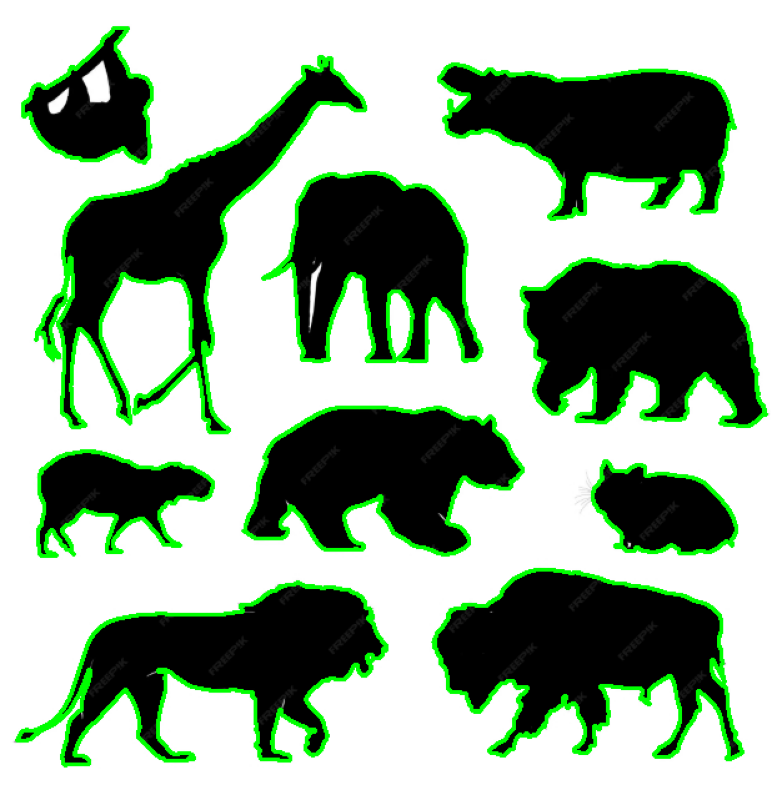

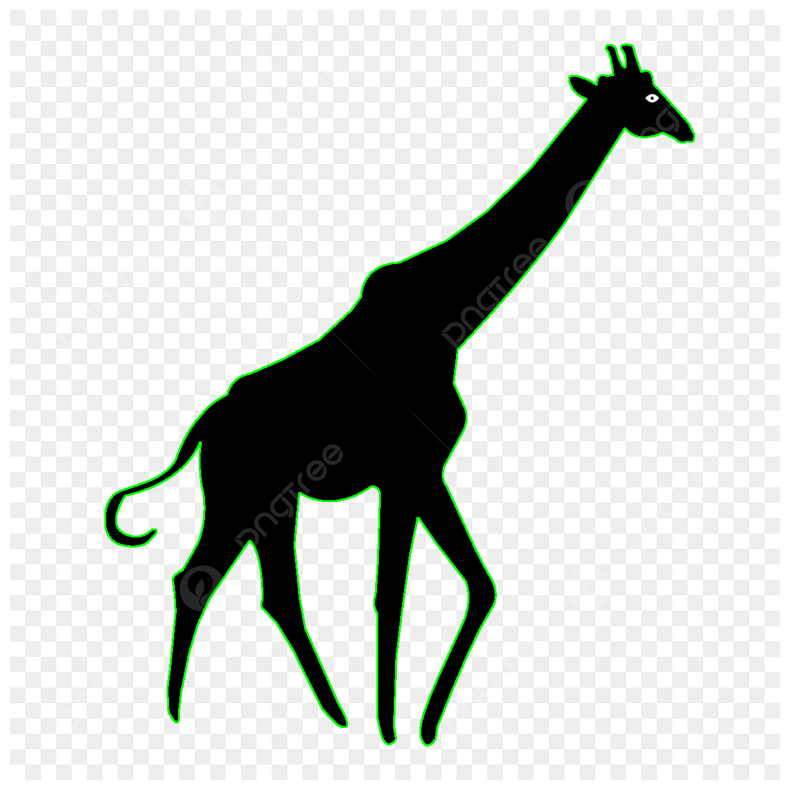

In [91]:
# Read the images
img = cv2.imread('girafe_shadow.jpeg')
img2 = cv2.imread('animals.jpeg')

# Convert to grayscale
animals = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
girafe = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold to get binary images
_, animals_thresh = cv2.threshold(animals, 127, 255, cv2.THRESH_BINARY_INV)
_, girafe_thresh = cv2.threshold(girafe, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours_animals, _ = cv2.findContours(animals_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_girafe, _ = cv2.findContours(girafe_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Convert grayscale animals image back to BGR to draw colored contours
animals_bgr = cv2.cvtColor(animals, cv2.COLOR_GRAY2BGR)
girafe_bgr = cv2.cvtColor(girafe, cv2.COLOR_GRAY2BGR)


# Draw contours in green
cv2.drawContours(animals_bgr, contours_animals, -1, (0, 255, 0), 2)
cv2.drawContours(girafe_bgr, contours_girafe, -1, (0, 255, 0), 2)

# Convert BGR to RGB for matplotlib
animals_rgb = cv2.cvtColor(animals_bgr, cv2.COLOR_BGR2RGB)
girafe_rgb = cv2.cvtColor(girafe_bgr, cv2.COLOR_BGR2RGB)


# Display using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(animals_rgb)
plt.axis('off')
plt.show()

# Display using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(girafe_rgb)
plt.axis('off')
plt.show()

[(8, 0.288862235025214), (0, 1.6184290227157223), (7, 1.9246102950830792), (3, 1.982896249578633), (2, 2.1542570844517717), (1, 2.1692973603053316), (4, 2.3193398660018976), (5, 2.419808139512898), (6, 2.5589348407182455), (9, 2.674267737868931)]


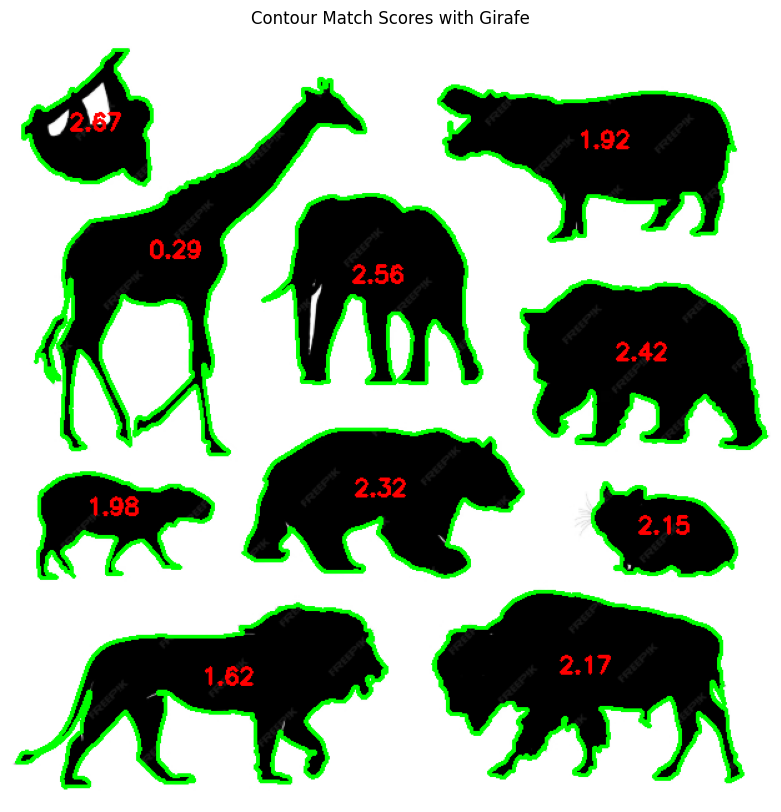

In [94]:
#Do the shape matching
# Store match scores
match_scores = []

for i, cnt in enumerate(contours_animals):
    score = cv2.matchShapes(contours_girafe[0], cnt, cv2.CONTOURS_MATCH_I1, 0.0)
    match_scores.append((i, score))

# Sort by score (lower means better match)
match_scores.sort(key=lambda x: x[1])
print(match_scores)

# Create a new copy of the image to annotate
annotated_img = img2.copy()

# Draw all contours and put match scores using OpenCV (since drawing is needed)
for i, cnt in enumerate(contours_animals):
    M = cv2.moments(cnt)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00']) #centroid
        cy = int(M['m01'] / M['m00'])
        score = next(s for idx, s in match_scores if idx == i)
        cv2.putText(annotated_img, f"{score:.2f}", (cx - 20, cy),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    cv2.drawContours(annotated_img, [cnt], -1, (0, 255, 0), 2)

# Convert to RGB for matplotlib
annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

# Plot using only matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(annotated_img_rgb)
plt.title("Contour Match Scores with Girafe")
plt.axis('off')
plt.show()


## **Lines detection: Hough method**


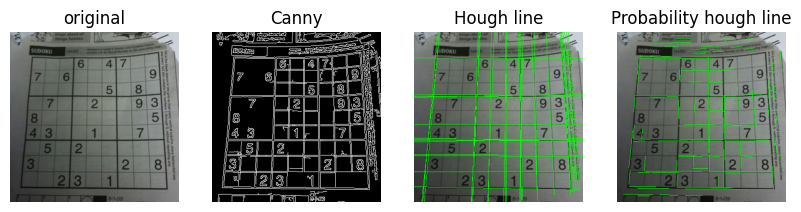

In [109]:
img = cv2.imread('sudoku.jpg')

img2 = img.copy()
h, w = img.shape[:2]
img3 = img.copy()
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(imgray, 10, 200 )

lines = cv2.HoughLines(edges.copy(), 1, np.pi/180, 130)

for line in lines:
    r,theta = line[0]
    tx, ty = np.cos(theta), np.sin(theta)
    x0, y0= tx*r, ty*r

    x1, y1 = int(x0 + w*(-ty)), int(y0 + h * tx)
    x2, y2 = int(x0 - w*(-ty)), int(y0 - h * tx)
    cv2.line(img2, (x1, y1), (x2, y2), (0,255,0), 1)


linesP = cv2.HoughLinesP(edges.copy(), 1, np.pi/180, 10, None, 20, 2)
for line in linesP:
    x1, y1, x2, y2 = line[0]
    cv2.line(img3, (x1,y1), (x2, y2), (0,255,0), 1)


fig, axs = plt.subplots(1, 4, figsize=(10,10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('Canny')
axs[2].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), axs[2].axis('off'), axs[2].set_title('Hough line')
axs[3].imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)), axs[3].axis('off'), axs[3].set_title('Probability hough line')

plt.show()

## **Circle detection: Hough method**


In [110]:
img=files.upload()


Saving eye.jpg to eye.jpg


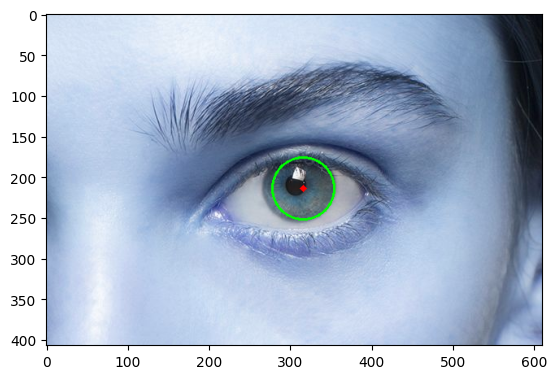

array([[[316, 214,  38]]], dtype=uint16)

In [123]:
img = cv2.imread('eye.jpg')

img2 = img.copy()
# Convert to grayscale.
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Blur using 3 * 3 kernel.
gray_blurred = cv2.blur(gray, (3, 3))

# Apply Hough transform on the blurred image.
detected_circles = cv2.HoughCircles(gray_blurred,
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 50,
                   param2 = 30, minRadius = 20, maxRadius = 40)


# Convert the circle parameters a, b and r to integers.
detected_circles = np.uint16(np.around(detected_circles))

for pt in detected_circles[0, :]:
    a, b, r = pt[0], pt[1], pt[2]

    # Draw the circumference of the circle.
    cv2.circle(img, (a, b), r, (0, 255, 0), 2)

    # Draw a small circle (of radius 1) to show the center.
    cv2.circle(img, (a, b), 2, (255, 0, 0), 3)
    plt.imshow(img)
    plt.show()

detected_circles